# Volkswagen_used_car_EDA
- submited by: Subrata Saha
- Date: 25.02.2022


#### Contents:
-  Read dataset and EDA. 
- Bar plot and pie chart of transmission column. 
- Bar plot and pie chart of fuelType column. 

#### 1. Import required libraries and packages

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read dataset

In [2]:
df = pd.read_csv("vw.csv")

#display(df.head())
# show 5 sample observations
display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
8706,Polo,2018,11650,Manual,13853,Petrol,60.1,1.0
4354,Golf,2020,23999,Manual,500,Petrol,47.1,1.5
14348,Touran,2016,16499,Semi-Auto,24230,Diesel,64.2,1.6
4684,Golf,2017,12600,Semi-Auto,33698,Diesel,68.9,1.6
10203,Tiguan,2018,19495,Manual,7160,Petrol,46.3,1.4


#### 3. Check for missing values, data types of the columns

In [3]:
df.info()

# Nan - not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


In [4]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(15157, 8)
number of rows =  15157
number of columns =  8


#### Count the number of unique values present in the 'year' column

In [5]:
print(df["year"].unique())

print(len(df["year"].unique()))

#print(df["year"].values)
print(df["year"].value_counts())

[2019 2020 2018 2017 2015 2016 2013 2014 2009 2010 2004 2003 2012 2011
 2008 2000 2006 2002 2005 2007 2001]
21
2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64


#### Count the number of unique values present in the 'model' column

In [6]:
print(df["model"].value_counts())

 Golf               4863
 Polo               3287
 Tiguan             1765
 Passat              915
 Up                  884
 T-Roc               733
 Touareg             363
 Touran              352
 T-Cross             300
 Golf SV             268
 Sharan              260
 Arteon              248
 Scirocco            242
 Amarok              111
 Caravelle           101
 CC                   95
 Tiguan Allspace      91
 Beetle               83
 Shuttle              61
 Caddy Maxi Life      59
 Jetta                32
 California           15
 Caddy Life            8
 Eos                   7
 Caddy                 6
 Caddy Maxi            4
 Fox                   4
Name: model, dtype: int64


#### Count the number of unique values present in the 'transmission' column

In [7]:
print(df["transmission"].value_counts())

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64


#### Count the number of unique values present in the 'engineSize' column

In [8]:
print(df["engineSize"].value_counts())

2.0    5570
1.0    3121
1.6    1629
1.4    1536
1.5    1446
1.2    1304
3.0     450
1.8      77
0.0      15
1.9       4
2.5       3
3.2       2
Name: engineSize, dtype: int64


#### Count the number of unique values present in the 'fuelType' column

In [9]:
print(df["fuelType"].value_counts())

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64


#### 4. Pie Chart and Bar plot on transmission column

#### 4.1. Pie Chart on 'transmission' column

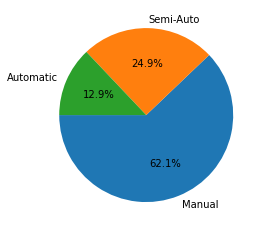

In [10]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

#### 4.2.  Bar plot on 'transmission' column

In [11]:
print(df["transmission"].value_counts())

print(type(df["transmission"].value_counts()))

# convert to dataframe
df_transmission = pd.DataFrame(df["transmission"].value_counts())

display(df_transmission.head())
print(df_transmission.index)
print(df_transmission.columns)

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64
<class 'pandas.core.series.Series'>


,transmission
Manual,9417
Semi-Auto,3780
Automatic,1960


Index(['Manual', 'Semi-Auto', 'Automatic'], dtype='object')
Index(['transmission'], dtype='object')


In [12]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

# df_transmission = np.round(df_transmission, 2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,9417,62.13
1,Semi-Auto,3780,24.94
2,Automatic,1960,12.93


#### Create a Barplot for the 'transmission' column

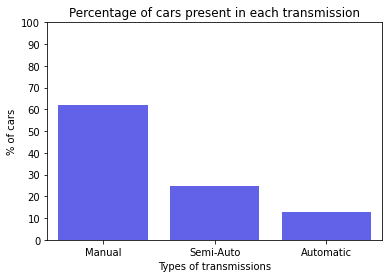

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="blue",
            alpha=0.7)

plt.xlabel("Types of transmissions")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")

plt.yticks(np.arange(0,101,10))

plt.show()

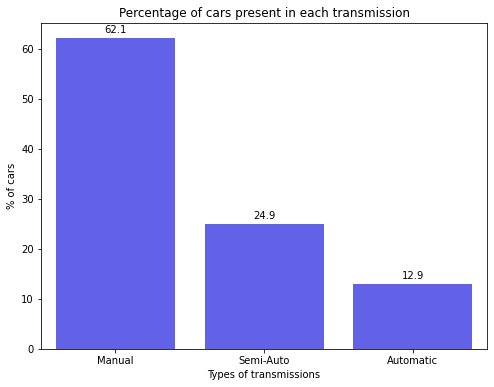

In [14]:
# using annotations

plt.figure(figsize=(8, 6))
splot=sns.barplot(x="transmission",y="% of cars",data=df_transmission,color="blue",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of transmissions")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")
plt.show()

 <br> **NOTE**: From Barplot and pie chart of the transmission column, we can notice that, More than half of the cars have Manual transmission and, almost 13% cars have automatic transmission which is the lowest among the three types of transmissions.

#### 5. Pie Chart and Bar plot on fuelType column

#### 5.1. Pie Chart on 'fuelType' column

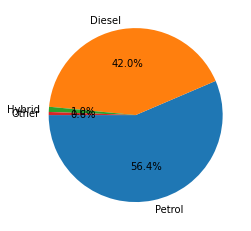

In [15]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.show()

 <br> **NOTE**: From pie chart of the fuelType column, we can notice that, More than half of the cars uses petrol as fuel.
 one problem with pie chart is that 'hybrid' and 'other' fuel type is indistinguishable,so we need another type of visualization.

#### 5.2.  Bar plot on 'fuelType' column

#### Find the percentage of unique values present in the 'fuelType' column

In [16]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,8553,56.43
1,Diesel,6372,42.04
2,Hybrid,145,0.96
3,Other,87,0.57


#### Create a Barplot for the 'fuelType' column

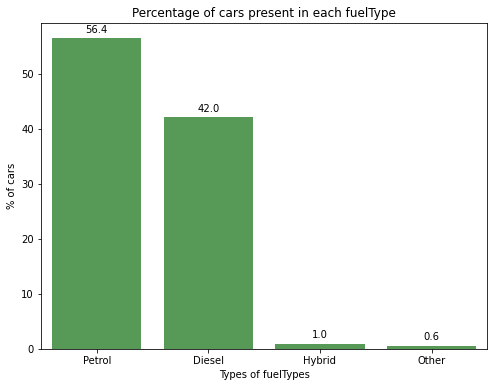

In [17]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="fuelType",y="% of cars",data=df_fuelType,color="g",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of fuelTypes")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")
plt.show()

 <br> **NOTE**: This visualization is better than pie chart, and we can deduce that hybrid and other fueltype is very negligible and almost zero compared to petrol and diesel fueltype.

### --- FINISH---